<a href="https://colab.research.google.com/github/Saket1002/experiment001/blob/master/CtoF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np


Following is our input and output vectors

In [3]:
x_celsius  = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
y_fahrenheit  = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)


We already know this is a simple linear problem. Hence we don't need a complex model to learn the relationship.

We will create a simple model with single layer , single unit and no activation 
input_shape=[1] specifies that each input is an array of size 1, 
units=1 specifies that this layer will have only one unit. 



Note : 

loss function and optimizer can be provided by two ways. 
1. by name - in this case all hyperpaeameter values are taken as defaule.  Example 'mean_squared_error' for loss function.

2. as an object, this allows hyperparameter tuning. Example tf.keras.optimizers.Adam(0.1) for optimizer.

All three option below is valid configuration. However "Adam" will use default learning rate of 0.001 which is too small for this usecase.

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1], name="Layer-1")
], name="CtoF")

model.compile(optimizer=tf.keras.optimizers.Adam(0.1) , loss='mean_squared_error')

# other ways we can define optimizer and loss funtions.


# model.compile(optimizer=tf.keras.optimizers.Adam(0.1) , loss=tf.keras.losses.MeanSquaredError())
# model.compile(optimizer="Adam" , loss='mean_squared_error')
 

# Debugging tip 1. Check the model summery. 
Give specific name to model and layers- this will make reading summery easy.

In [5]:
model.summary()

Model: "CtoF"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer-1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train the model

history = model.fit(x_celsius, y_fahrenheit, epochs=500, verbose=False)


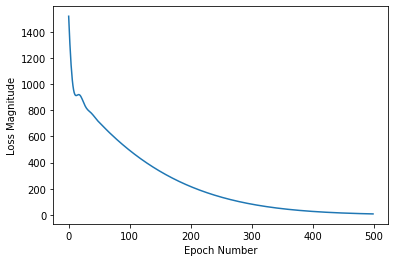

In [7]:
import matplotlib.pyplot as plt
def draw_loss_curve(history):
  plt.xlabel('Epoch Number')
  plt.ylabel("Loss Magnitude")
  plt.plot(history.history['loss'])

draw_loss_curve(history)

In [8]:
print("model predicted value for 100 degree C {} degree F".format(model.predict([100.0])))
print("actual value for 100 degree C {} degree F ".format(100*1.8+32))

model predicted value for 100 degree C [[211.33679]] degree F
actual value for 100 degree C 212.0 degree F 


In [9]:
model.layers[0].get_weights()

[array([[1.8207141]], dtype=float32), array([29.265387], dtype=float32)]

Conclusion : Learned weights are 1.82 and 29 against actual value of 1.8 and 32.  this is great as this took only 7 samples.
